<a href="https://colab.research.google.com/github/anisha9658/Chat_Bot/blob/main/AI_CHATBOT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import the libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import json
import nltk
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, GlobalMaxPooling1D, Flatten
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt


In [ ]:
%%writefile content.json
{"intents":
[
  {
    "tag":"greetings",
    "input":["hello","hi","good day","greetings","whats up","how is it going?","hey"],
    "responses":[
      "hey! what can I do for you",
      "hello!",
      "hey",
      "hi",
      "good day"
    ]
  },
  {"tag":"goodbye",
  "input":["see you later","goodbye","have a good day","bye","I am leaving","Tata"],
  "responses":[
    "okay bye",
    "goodbye!",
    "Talk to you later"
  ]
  },
  {"tag":"age",
  "input":["how old are you ","your age","what's your age","how old are you","age?"],
  "responses":[
    "My owner Anisha is 20 year old,if you are asking about me I'm just 15 day old hehe!"
  ]
  },
  {"tag":"name",
  "input":["what is your name","What should I call you","whats your name?","who are you?","name?","may I know your name?"],
  "responses":[
    "You can call me Misa,assistant of Anisha"
  ]
  },
  {"tag":"call",
  "input":["Can we talk over phone?","Call me!","Are you busy, call me now"],
  "responses":[
    "Anisha is busy now she will you soon",
    "Please leave a massage she will call"
  ]
  },
  {"tag":"Thankyou",
  "input":["Thank you ","thanks","okay","ok","oh","ohok","hmm"],
  "responses":[
    "How can I help you more"
  ]
  },
  {"tag":"Doing",
  "input":["What are you doing?","where are you?","How are you?"],
  "responses":[
    "Anisha is busy, I'm her assistant you can leave a message here."
  ]
  },
  {"tag":"Anisha",
  "input":["When will be Anisha back","What is she/Anisha doing?"],
  "responses":[
    "I don't know. please leave a message,she will get back to you as soon as she read the message"
  ]
  }

]}

Overwriting content.json


In [ ]:
#importing all the dataset
with open('content.json') as content:
  data1 = json.load(content)

In [ ]:
#getting all the data to lists
tags = []
inputs = []
responses = {}
for intent in data1['intents']:
  responses[intent['tag']]=intent['responses']
  for lines in intent['input']:
    inputs.append(lines)
    tags.append(intent['tag'])

In [ ]:
#converting to dataframe
data = pd.DataFrame({"inputs":inputs,
                     "tags":tags})

In [ ]:
#printing the data
data

,inputs,tags
0,hello,greetings
1,hi,greetings
2,good day,greetings
3,greetings,greetings
4,whats up,greetings
5,how is it going?,greetings
6,hey,greetings
7,see you later,goodbye
8,goodbye,goodbye
9,have a good day,goodbye


In [ ]:
#removing punctuations
import string
data['inputs'] = data['inputs'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['inputs'] = data['inputs'].apply(lambda wrd: ''.join(wrd))
data

,inputs,tags
0,hello,greetings
1,hi,greetings
2,good day,greetings
3,greetings,greetings
4,whats up,greetings
5,how is it going,greetings
6,hey,greetings
7,see you later,goodbye
8,goodbye,goodbye
9,have a good day,goodbye


In [ ]:
#tokenize the data
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(data['inputs'])
train = tokenizer.texts_to_sequences(data['inputs'])

In [ ]:
#apply padding
from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences(train)

In [ ]:
#encoding the outputs
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(data['tags'])

In [ ]:
input_shape = x_train.shape[1]
print(input_shape)

6


In [ ]:
#define vocabulary
vocabulary = len(tokenizer.word_index)
print("number of unique word :",vocabulary)
output_length = le.classes_.shape[0]
print("output length: ",output_length)

number of unique word : 57
output length:  8


In [ ]:
#creating the model

i = Input(shape=(input_shape,))
x = Embedding(vocabulary+1,10)(i)
x = LSTM(10,return_sequences=True)(x)
x = Flatten()(x)
x = Dense(output_length,activation="softmax")(x)
model = Model(i,x)

In [ ]:
#compiling the model
model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [ ]:
#training the model
train = model.fit(x_train,y_train,epochs=320)

Epoch 1/320
2/2 [==============================] - 11s 17ms/step - loss: 2.0791 - accuracy: 0.0769
Epoch 2/320
2/2 [==============================] - 0s 15ms/step - loss: 2.0769 - accuracy: 0.1795
Epoch 3/320
2/2 [==============================] - 0s 15ms/step - loss: 2.0750 - accuracy: 0.2051
Epoch 4/320
2/2 [==============================] - 0s 20ms/step - loss: 2.0734 - accuracy: 0.1795
Epoch 5/320
2/2 [==============================] - 0s 16ms/step - loss: 2.0718 - accuracy: 0.2051
Epoch 6/320
2/2 [==============================] - 0s 12ms/step - loss: 2.0699 - accuracy: 0.2564
Epoch 7/320
2/2 [==============================] - 0s 18ms/step - loss: 2.0683 - accuracy: 0.3077
Epoch 8/320
2/2 [==============================] - 0s 33ms/step - loss: 2.0664 - accuracy: 0.3077
Epoch 9/320
2/2 [==============================] - 0s 29ms/step - loss: 2.0645 - accuracy: 0.3077
Epoch 10/320
2/2 [==============================] - 0s 15ms/step - loss: 2.0627 - accuracy: 0.3333
Epoch 11/320
2/2 [

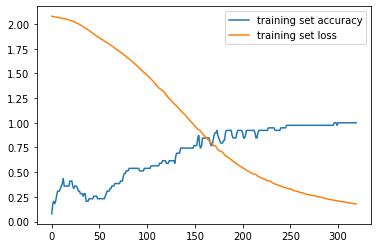

In [ ]:
#model Analysis
#check accuracy
plt.plot(train.history['accuracy'],label='training set accuracy')
plt.plot(train.history['loss'],label='training set loss')
plt.legend()

In [ ]:
#chatting
import random

while True:
  texts_p = []
  prediction_input = input('you:')

  #removing punctuation and converting to lowercase
  prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
  prediction_input = ''.join(prediction_input)
  texts_p.append(prediction_input)

  #tokenizing and padding
  prediction_input = tokenizer.texts_to_sequences(texts_p)
  prediction_input = np.array(prediction_input).reshape(-1)
  prediction_input = pad_sequences([prediction_input],input_shape)

  #getting output from devloped model
  output = model.predict(prediction_input)
  output = output.argmax()

  #finding the right tag
  response_tag = le.inverse_transform([output])[0]
  print("Misa : ",random.choice(responses[response_tag]))
  if response_tag == "goodbye":
    break

you:hello
1/1 [==============================] - 0s 29ms/step
Misa :  hey! what can I do for you
you:how old are you
1/1 [==============================] - 0s 21ms/step
Misa :  My owner Anisha is 20 year old,if you are asking about me I'm just 15 day old hehe!
you:goodbye
1/1 [==============================] - 0s 21ms/step
Misa :  goodbye!
